# Importing libraries

In [ ]:
!pip install --upgrade pip
!pip install tensorflow keras category_encoders tf-keras gensim
!pip install transformers sentence-transformers underthesea
!pip install chardet pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 161.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [category_encoders]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 146.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 159.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import time
import math
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from sklearn.preprocessing import LabelEncoder
import re
import gc
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch
import tqdm
from smart_open import open
import requests
from sklearn.decomposition import PCA
from gensim.models import KeyedVectors
import gdown
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Reading and data

## **1. Candidate Data**

In [ ]:
url_candidate = "https://drive.google.com/file/d/1x-i458iioDgWg25sfF5Cvtzz6B0fsbFu/view?usp=drive_link"
file_id_candidate = url_candidate.split('/d/')[1].split('/')[0]
csv_url_candidate = f'https://drive.google.com/uc?id={file_id_candidate}'
candidate_df = pd.read_csv(csv_url_candidate)
candidate_df.drop("Unnamed: 0", axis=1, inplace=True)
display(candidate_df.head(5))

,user_url,userid,user_name,industry,workplace_desired,desired_salary,gender,marriage,age,work_experience,desired_job_translated,proc_desired_job,proc_industry,proc_workplace
0,https://timviec365.vn/uvtv2/dao-huu-tai-uv1111...,1111684868,Đào Hữu Tài,Kd Bất Động Sản,Hà Nội,Thỏa Thuận,Nam,Độc Thân,38.0,Dưới 1 năm,Chuyên Viên Kinh Doanh Bất Động Sản,chuyên_viên kinh_doanh bất_động_sản,kd bất_động_sản,h_nội
1,https://timviec365.vn/uvtv2/ho-vinh-duc-uv199803,199803,Hồ Vĩnh Đức,Xây Dựng,Hồ Chí Minh,Thỏa Thuận,Nam,Khác,37.0,Không yêu cầu kinh nghiệm,Kỹ Sư Kinh Tế Xây Dựng,kỹ_sư kinh_tế y_dựng,y_dựng,hồ chí minh
2,https://timviec365.vn/uvtv2/ngo-thi-bich-tram-...,1271594,Ngô Thị Bích Trâm,Khách Sạn - Nhà Hàng,Khánh Hòa,Thỏa Thuận,Nam,Độc Thân,NaN,Chưa Có Kinh Nghiệm,Nhân Viên Nhà Hàng,nh viên nh h_ng,khách_sạn nh h_ng,khánh_hòa
3,https://timviec365.vn/uvtv2/vo-ba-loi-uv160413,160413,Võ Bá Lợi,Giao Thông Vận Tải - Thủy Lợi - Cầu Đường,Hồ Chí Minh,Thỏa Thuận,Nam,Độc Thân,NaN,Chưa Có Kinh Nghiệm,Đầu Bếp,đầu_bếp,giao_thông vận_tải thủy_lợi cầu_đường,hồ chí minh
4,https://timviec365.vn/uvtv2/vo-thi-thuy-van-uv...,1111646039,Võ Thị Thuỳ Vân,Quản Trị Kinh Doanh,Đồng Nai,Thỏa Thuận,Nữ,Độc Thân,21.0,Chưa Có Kinh Nghiệm,Thực Tập Sinh Kinh Doanh,thực_tập_sinh kinh_doanh,quản_trị kinh_doanh,đồng_nai


In [ ]:
candidate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44963 entries, 0 to 44962
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_url                44963 non-null  object 
 1   userid                  44963 non-null  int64  
 2   user_name               44963 non-null  object 
 3   industry                43833 non-null  object 
 4   workplace_desired       44445 non-null  object 
 5   desired_salary          44963 non-null  object 
 6   gender                  44963 non-null  object 
 7   marriage                44963 non-null  object 
 8   age                     25952 non-null  float64
 9   work_experience         44963 non-null  object 
 10  desired_job_translated  44962 non-null  object 
 11  proc_desired_job        44788 non-null  object 
 12  proc_industry           43833 non-null  object 
 13  proc_workplace          44445 non-null  object 
dtypes: float64(1), int64(1), object(12)
me

## **2. Job Data**

In [ ]:
url_job = "https://drive.google.com/file/d/1D3KHwjwWG34Y64oS353tj_1WYY9sEokM/view?usp=sharing"
file_id_job = url_job.split('/d/')[1].split('/')[0]
csv_url_job = f'https://drive.google.com/uc?id={file_id_job}'
job_df = pd.read_csv(csv_url_job, index_col=False)
display(job_df.head(5))

,Job_Name,Company_name,Location,Salary,Time,Benefit,Description,Requirement,URL,Industry,Type,Requirement_processed,Type_processed,Description_processed,Industry_processed,Job_Name_processed,Location_processed
0,Chuyên Viên Hỗ Trợ Kỹ Thuật ( ô tô thương mại)...,CÔNG TY CP TM DV AN SƯƠNG,Hà Nội,Cạnh tranh,10/31/2025,"Chế độ bảo hiểm, Du Lịch, Đồng phục, Chế độ th...",• Hỗ trợ kỹ thuật & hướng dẫn sửa chữa cho hệ ...,• Tốt nghiệp đại học ngành Cơ khí ô tô. • Tối ...,https://careerviet.vn/vi/tim-viec-lam/chuyen-v...,Cơ khí / Ô tô / Tự động hóa,Nhân viên chính thức,tốt_nghiệp đại_học ng nh cơ_khí ô_tô tối_thiểu...,nh n viên chính_thức,hỗ_trợ kỹ_thuật hướng_dẫn sửa_chữa hệ_thống đạ...,cơ_khí ô_tô tự_động_hóa,chuyên_viên hỗ_trợ kỹ_thuật ô_tô thương_mại mới,h_nội
1,CHUYÊN VIÊN PHỤ TÙNG (MỚI),CÔNG TY CP TM DV AN SƯƠNG,Hồ Chí Minh,"5,000,000 - 10,000,000",9/30/2025,"Chế độ bảo hiểm, Du Lịch, Đồng phục, Chế độ th...","- Xây dựng chính sách, kế hoạch và KPI kinh do...","-Tốt nghiệp ĐH ngành Cơ khí ô tô, Logistics, K...",https://careerviet.vn/vi/tim-viec-lam/chuyen-v...,Tiếp thị / Marketing,Nhân viên chính thức,tốt_nghiệp đh ng nh cơ_khí ô_tô logistics kinh...,nh n viên chính_thức,x y dựng chính_sách kế_hoạch v kpi kinh_doanh ...,tiếp_thị marketing,chuyên_viên phụ_tùng mới,hồ chí minh
2,PHÓ TRƯỞNG BỘ PHẬN PHÁP LÝ – ĐĂNG KIỂM XE CBU/...,CÔNG TY CP TM DV AN SƯƠNG,Hà Nội,Cạnh tranh,8/31/2025,"Chế độ bảo hiểm, Du Lịch, Đồng phục, Chế độ th...",Mô tả công việc: - Quản lý hồ sơ pháp lý – kỹ ...,"- Tốt nghiệp kỹ thuật ô tô, cơ khí, luật hoặc ...",https://careerviet.vn/vi/tim-viec-lam/pho-truo...,Luật / Pháp lý,Nhân viên chính thức,tốt_nghiệp kỹ_thuật ô_tô cơ_khí luật liên_quan...,nh n viên chính_thức,mô_tả công_việc quản_lý hồ_sơ pháp_lý kỹ_thuật...,luật pháp_lý,phó_trưởng bộ_phận pháp_lý đăng_kiểm xe cbu ck...,h_nội
3,Tài Xế Lái Xe Cho Giám Đốc (MỚI),CÔNG TY CP TM DV AN SƯƠNG,Hồ Chí Minh,"5,000,000 - 10,000,000",6/30/2025,"Chế độ bảo hiểm, Du Lịch, Đồng phục, Chế độ th...","Mô tả công việc Phụ trách đưa đón, chuyên chở ...","Nam, sức khỏe tốt, không bị cận; GPLX hạng B2 ...",https://careerviet.vn/vi/tim-viec-lam/tai-xe-l...,Vận chuyển / Giao nhận / Kho vận,Nhân viên chính thức,nam sức_khỏe tốt cận gplx hạng b2 trở lên sẵn ...,nh n viên chính_thức,mô_tả công_việc phụ_trách đưa_đón chuyên_chở l...,vận_chuyển_giao_nhận kho vận,t i xế lái_xe giám_đốc mới,hồ chí minh
4,Phiên dịch viên tiếng Trung Quốc (MỚI),CÔNG TY CP TM DV AN SƯƠNG,Hà Nội,"15,000,000 - 20,000,000",8/31/2025,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...","- Phiên dịch, biên dịch tài liệu kỹ thuật và n...",- Thành thạo tiếng Trung - Ưu tiên ứng viên có...,https://careerviet.vn/vi/tim-viec-lam/phien-di...,Hành chính / Thư ký,Nhân viên chính thức,th nh thạo tiếng trung ưu_tiên ứng_viên kinh_n...,nh n viên chính_thức,phiên_dịch biên_dịch t_i liệu kỹ_thuật v nội_d...,h nh chính thư_ký,phiên_dịch_viên tiếng trung quốc mới,h_nội


In [ ]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21858 entries, 0 to 21857
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job_Name               21858 non-null  object
 1   Company_name           21858 non-null  object
 2   Location               21858 non-null  object
 3   Salary                 21858 non-null  object
 4   Time                   21858 non-null  object
 5   Benefit                21254 non-null  object
 6   Description            21550 non-null  object
 7   Requirement            21593 non-null  object
 8   URL                    21858 non-null  object
 9   Industry               20164 non-null  object
 10  Type                   20164 non-null  object
 11  Requirement_processed  21592 non-null  object
 12  Type_processed         20164 non-null  object
 13  Description_processed  21550 non-null  object
 14  Industry_processed     20164 non-null  object
 15  Job_Name_processed 

**Handling desired_salary and work_experience**

In [ ]:
print("Các kiểu dữ liệu của work_experience là:", candidate_df['work_experience'].unique())
print("Các kiểu dữ liệu của desired_salary là:", candidate_df['desired_salary'].unique())

Các kiểu dữ liệu của work_experience là: ['Dưới 1 năm' 'Không yêu cầu kinh nghiệm' 'Chưa Có Kinh Nghiệm' '1-3 năm'
 '3-5 năm' 'Trên 10 năm' '5-10 năm']
Các kiểu dữ liệu của desired_salary là: ['Thỏa Thuận' '1,000,000 - 5,000,000' '5,000,000 - 10,000,000'
 '10,000,000 - 15,000,000' 'Trên 40,000,000' '15,000,000 - 20,000,000'
 '20,000,000 - 40,000,000']


In [ ]:
print("Các cột dữ liệu Ứng viên là:", candidate_df.columns)
print("Các cột dữ liệu Công viên là:", job_df.columns)

Các cột dữ liệu Ứng viên là: Index(['user_url', 'userid', 'user_name', 'industry', 'workplace_desired',
       'desired_salary', 'gender', 'marriage', 'age', 'work_experience',
       'desired_job_translated', 'proc_desired_job', 'proc_industry',
       'proc_workplace'],
      dtype='object')
Các cột dữ liệu Công viên là: Index(['Job_Name', 'Company_name', 'Location', 'Salary', 'Time', 'Benefit',
       'Description', 'Requirement', 'URL', 'Industry', 'Type',
       'Requirement_processed', 'Type_processed', 'Description_processed',
       'Industry_processed', 'Job_Name_processed', 'Location_processed'],
      dtype='object')


**Encode work_experience**

In [ ]:
def encode_work_experience(df, col='work_experience'):
    mapping = {
        'Không yêu cầu kinh nghiệm': 0,
        'Chưa Có Kinh Nghiệm': 0,
        'Dưới 1 năm': 0.5,
        '1-3 năm': 2,
        '3-5 năm': 4,
        '5-10 năm': 7.5,
        'Trên 10 năm': 11
    }
    df[col + '_enc'] = df[col].map(mapping).fillna(0)
    return df

**Encode desired_salary**

In [ ]:
def parse_salary(s):
    if 'Thỏa Thuận' in s:
        return 0
    if 'Trên' in s:
        s = re.sub(r'[^\d]', '', s)
        return int(s)
    else:
        numbers = re.findall(r'\d+', s.replace(',', ''))
        if len(numbers) == 2:
            avg = (int(numbers[0]) + int(numbers[1])) / 2
            return avg
    return 0

def encode_desired_salary(df, col='desired_salary'):
    df[col + '_enc'] = df[col].apply(parse_salary)
    return df

In [ ]:
candidate_df = encode_work_experience(candidate_df, 'work_experience')
candidate_df = encode_desired_salary(candidate_df, 'desired_salary')

In [ ]:
job_df = encode_desired_salary(job_df, 'Salary')

**Hàm tạo combined_text cho ứng viên và công việc**

In [ ]:
def create_combined_text_candidate(df):
    return (
        df['proc_desired_job'].fillna('') + ' ' +
        df['proc_industry'].fillna('') + ' ' +
        df['proc_workplace'].fillna('') + ' ' +
        df['work_experience_enc'].astype(str) + ' ' +
        df['desired_salary_enc'].astype(str)
    )

def create_combined_text_job(df):
    return (
        df['Job_Name_processed'].fillna('') + ' ' +
        df['Industry_processed'].fillna('') + ' ' +
        df['Location_processed'].fillna('') + ' ' +
        df['Requirement_processed'].fillna('') + ' ' +
        df['Description_processed'].fillna('') + ' ' +
        df['Salary_enc'].astype(str)
    )

In [ ]:
candidate_df['combined_text'] = create_combined_text_candidate(candidate_df)
job_df['combined_text'] = create_combined_text_job(job_df)

### NLP Techniques

## **TF-IDF**

In [ ]:
MAX_FEATURES = 10000   # Max words in vocabulary to keep memory low

# 1. Combine texts for a shared vocabulary
print("Building shared vocabulary...")
all_texts = pd.concat([
    candidate_df['combined_text'].fillna(''),
    job_df['combined_text'].fillna('')
], axis=0)

# 2. Create TF-IDF vectorizer (for Vietnamese, no 'stop_words' parameter)
vectorizer = TfidfVectorizer(max_features=MAX_FEATURES)
tfidf_matrix = vectorizer.fit_transform(all_texts)
del all_texts # Free up memory
gc.collect()

# 3. Split back into candidate and job vectors
n_candidates = candidate_df.shape[0]
candidate_tfidf = tfidf_matrix[:n_candidates]
job_tfidf = tfidf_matrix[n_candidates:]
del tfidf_matrix # Free up memory
gc.collect()

Building shared vocabulary...


0

In [ ]:
output_filename = "candidate_tfidf.npy"

# Save the array to the file
np.save(output_filename, candidate_tfidf)

In [ ]:
output_filename = "job_tfidf.npy"

# Save the array to the file
np.save(output_filename, job_tfidf)

## **Transformer(PhoBERT)**

**Loading PhoBEART**

In [ ]:
# Load PhoBERT
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModel.from_pretrained("vinai/phobert-base")

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

### **Generating Embeddings**

In [ ]:
def get_bert_embedding(text_list, tokenizer, model, max_length=128, batch_size=32):
    """
    Generates BERT embeddings with improved memory efficiency to prevent crashes.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # --- Key Improvement: Pre-allocate the NumPy array ---
    total_texts = len(text_list)
    embedding_dim = model.config.hidden_size  # Get embedding dimension from model config
    # Create an empty array with the final shape. This is much more memory-efficient.
    all_embeddings = np.empty((total_texts, embedding_dim), dtype=np.float32)

    with torch.no_grad():
        for i in tqdm.tqdm(range(0, total_texts, batch_size), desc="Generating Embeddings"):
            batch_texts = text_list[i:i+batch_size]

            inputs = tokenizer(
                batch_texts,
                padding='max_length',
                truncation=True,
                max_length=max_length,
                return_tensors="pt"
            )

            inputs = {key: val.to(device) for key, val in inputs.items()}
            outputs = model(**inputs)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

            # --- Key Improvement: Fill the pre-allocated array ---
            # Calculate the start and end index for the current batch
            start_index = i
            end_index = start_index + len(cls_embeddings)
            # Place the batch results directly into the correct slice of the final array
            all_embeddings[start_index:end_index] = cls_embeddings

    return all_embeddings

In [ ]:
candidate_texts = candidate_df['combined_text'].tolist()
job_texts = job_df['combined_text'].tolist()

In [ ]:
candidate_embeddings = get_bert_embedding(candidate_texts, tokenizer, model)
filename = 'candidate_embeddings.npy'
np.save(filename, candidate_embeddings)

Generating Embeddings:  25%|██▍       | 350/1406 [1:14:10<3:43:46, 12.71s/it]


KeyboardInterrupt: 

In [ ]:
job_embeddings = get_bert_embedding(job_texts, tokenizer, model)
filename = 'job_embeddings.npy'
np.save(filename, job_embeddings)

NameError: name 'get_bert_embedding' is not defined

### **Dimensional reduction with PCA** (768 -> 300)

**Load embeddings**

In [ ]:
candidate_url = 'https://drive.google.com/uc?id=1HO0ZlwbgxR0tQ5FKaORSNe0tSy882Prc'
job_url = 'https://drive.google.com/uc?id=1hC6i-pxHC9GKFXWZJmezndWGbhVBsbxq'

gdown.download(candidate_url, 'candidate_embeddings.npy', quiet=False)
gdown.download(job_url, 'job_embeddings.npy', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1HO0ZlwbgxR0tQ5FKaORSNe0tSy882Prc
From (redirected): https://drive.google.com/uc?id=1HO0ZlwbgxR0tQ5FKaORSNe0tSy882Prc&confirm=t&uuid=56cc27ed-dc5b-43d5-9fd4-f6be4a6f4d8c
To: /content/candidate_embeddings.npy
100%|██████████| 138M/138M [00:03<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hC6i-pxHC9GKFXWZJmezndWGbhVBsbxq
To: /content/job_embeddings.npy
100%|██████████| 67.1M/67.1M [00:01<00:00, 37.8MB/s]


'job_embeddings.npy'

In [ ]:
X_candidates = np.load('candidate_embeddings.npy', allow_pickle=True)
X_jobs = np.load('job_embeddings.npy', allow_pickle=True)

print(f"Original candidate shape: {X_candidates.shape}")
print(f"Original job shape: {X_jobs.shape}")

Original candidate shape: (44963, 768)
Original job shape: (21858, 768)


**Implementing PCA**

In [ ]:
# 1. Combine embeddings to fit PCA on the entire dataset
X_all = np.vstack((X_candidates, X_jobs))
print(f"Combined shape for PCA fitting: {X_all.shape}")

Combined shape for PCA fitting: (66821, 768)


In [ ]:
# 2. Initialize PCA
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(X_all)

PCA(n_components=300)

In [ ]:
# 4. Transform both candidate and job embeddings separately
X_candidates_reduced = pca.transform(X_candidates)
X_jobs_reduced = pca.transform(X_jobs)

print(f"\nNew reduced candidate shape: {X_candidates_reduced.shape}")
print(f"New reduced job shape: {X_jobs_reduced.shape}")


New reduced candidate shape: (44963, 300)
New reduced job shape: (21858, 300)


In [ ]:
# 5. (Optional but Recommended) Save your new, smaller embeddings
np.save('candidate_embeddings_reduced.npy', X_candidates_reduced)
np.save('job_embeddings_reduced.npy', X_jobs_reduced)

Number of components to explain 95% of variance: 270


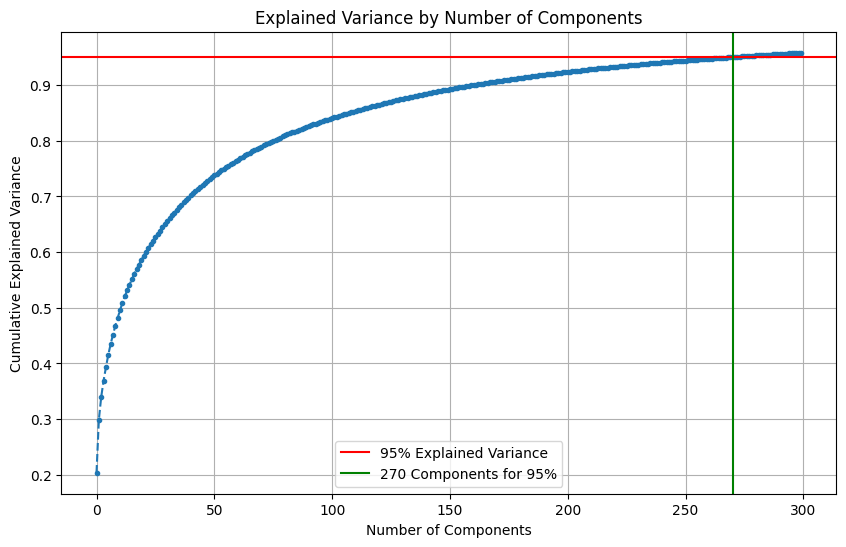

In [ ]:
# Use the PCA model already fitted on X_all
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain 95% of variance: {n_components_95}")

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='.', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=n_components_95, color='g', linestyle='-', label=f'{n_components_95} Components for 95%')
plt.legend(loc='best')
plt.show()

In [ ]:
def plot_pca_individually(X_2d, candidate_df, job_df, candidate_attr, job_attr, top_n=10):
    """
    Generates and displays a single, individual 2D PCA scatter plot, excluding NaN values.

    Args:
        X_2d (np.array): The 2D PCA-transformed data.
        candidate_df (pd.DataFrame): DataFrame with candidate data.
        job_df (pd.DataFrame): DataFrame with job data.
        candidate_attr (str): The attribute name in the candidate dataframe.
        job_attr (str): The attribute name in the job dataframe.
        top_n (int): Number of top categories to display for clarity.
    """
    print(f"--- Generating plot for: {candidate_attr} / {job_attr} ---")

    # 1. Combine labels from both dataframes
    try:
        candidate_labels = candidate_df[candidate_attr]
        job_labels = job_df[job_attr]
    except KeyError as e:
        print(f"Attribute not found: {e}. Skipping this plot.")
        return

    all_labels = pd.concat([candidate_labels, job_labels], ignore_index=True)

    # 2. Create a DataFrame for plotting
    df_2d = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])
    df_2d['label'] = all_labels
    df_2d['source'] = ['Candidate'] * len(candidate_df) + ['Job'] * len(job_df)

    # --- KEY CHANGE: Exclude rows with NaN labels ---
    df_2d.dropna(subset=['label'], inplace=True)
    df_2d['label'] = df_2d['label'].astype(str)

    # 3. Filter for top N categories to keep the plot readable
    top_categories = df_2d['label'].value_counts().nlargest(top_n).index
    df_plot = df_2d[df_2d['label'].isin(top_categories)]

    # 4. Generate the scatter plot in its own figure
    plt.figure(figsize=(16, 12))
    ax = sns.scatterplot(
        x='PC1', y='PC2',
        hue='label',
        style='source',
        palette=sns.color_palette("viridis", n_colors=len(top_categories)),
        data=df_plot,
        s=100,
        alpha=0.7
    )
    ax.set_title(f'PCA by "{job_attr}" (Top {top_n})', fontsize=18)
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)
    ax.legend(title=job_attr)
    ax.grid(True)

    # --- KEY CHANGE: Display the plot and wait for it to be closed ---
    plt.show()

In [ ]:
# 2. Perform 2D PCA (only once)
X_all = np.vstack((X_candidates, X_jobs))
pca_2d = PCA(n_components=2).fit_transform(X_all)

# 3. Define the attribute pairs to visualize
attribute_pairs = [
    {'cand': 'industry', 'job': 'Industry', 'top_n': 8},
    {'cand': 'workplace_desired', 'job': 'Location', 'top_n': 8},
    {'cand': 'desired_salary', 'job': 'Salary', 'top_n': 8}
]

# 4. Loop through the pairs and generate a plot for each one individually
for pair in attribute_pairs:
    plot_pca_individually(
        pca_2d,
        candidate_df,
        job_df,
        pair['cand'],
        pair['job'],
        top_n=pair['top_n']
    )

Output hidden; open in https://colab.research.google.com to view.

The plots clearly demonstrate that your combined-text embeddings, even after significant dimensionality reduction with PCA, have captured the most important semantic structures in your data. Your model is learning logical, real-world relationships, which is exactly what you want for a high-quality recommender system.

---

### Detailed Analysis of Each Plot

#### 1. PCA by "Industry" (The Strongest Signal)

*   **What We See:** There is a very clear and strong separation into two massive super-clusters along the horizontal axis (Principal Component 1).
    *   The **right cluster (light green/yellow)** is dominated by "Bán hàng / Kinh doanh" (Sales / Business).
    *   The **left cluster (dark purple/blue)** contains all the other corporate support roles like "Hành Chính" (Admin), "Kế toán" (Accounting), "Marketing", etc.
*   **Inference:** The single most important feature your model has learned is the difference between a **client-facing sales role** and an **internal business-support role**. This is a powerful and logical distinction. Within the left cluster, there is some mixing, which indicates that roles like Accounting and HR are more similar to each other than they are to Sales.

#### 2. PCA by "Salary" (Confirms the Industry Signal)

*   **What We See:** The structure is almost identical to the Industry plot.
    *   The **right cluster** is dominated by "Cạnh tranh" (Competitive) and higher salary bands.
    *   The **left cluster** is dominated by "Thỏa Thuận" (Negotiable) and lower salary bands.
*   **Inference:** Your model has discovered a strong real-world correlation: **Sales roles are highly correlated with competitive/higher salaries**, while support roles are more likely to have lower or negotiable salaries. This is not something you explicitly programmed; the model learned this economic reality from the text, which is a sign of a robust embedding process.

#### 3. PCA by "Location" (A Weaker, but Important Signal)

*   **What We See:** The separation here is much less distinct. The two large super-clusters from the other plots are still visible, but the location colors are mixed throughout. For example, "Hà Nội" and "Hồ Chí Minh" (the dark purple and blue dots) appear in both the left and right clusters.
*   **Inference:** This is also an **excellent sign**. It means your model correctly understands that **job function is more important than location**. A sales job in Hanoi is more similar to a sales job in HCMC than it is to an accounting job in Hanoi. Location is a secondary factor, which is precisely how a good job recommender should behave.

---

### Key Takeaways & Final Verdict

1.  **Your Embeddings are High-Quality:** The clear, logical clustering proves that your method of combining text features into a single string and then running it through a powerful model (like BERT or PhoW2V) has worked exceptionally well.
2.  **PCA is Preserving Meaning:** The fact that these clusters are visible in a simple 2D representation means that PCA has successfully retained the most important semantic information.
3.  **Candidate-Job Overlap is Good:** Within each cluster (e.g., the light green "Sales" cluster), there is a healthy mix of circles (Candidates) and crosses (Jobs). This is critical. It shows that candidates looking for sales jobs are in the same semantic space as the sales job postings themselves, which will allow for accurate matching.

**You are ready to proceed.** You can be confident that using these reduced embeddings to calculate cosine similarity will produce relevant and high-quality job recommendations.

## **Word Embeddings (Pho2Vec)**

### 300 dimension model

In [ ]:
#300 dimension model
url = "https://drive.google.com/uc?id=1sFO_lPxEjiJ7Ny-ZVxpoUFj1n3sDUgeB"
gdown.download(url, "pho2vec.model", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1sFO_lPxEjiJ7Ny-ZVxpoUFj1n3sDUgeB
From (redirected): https://drive.google.com/uc?id=1sFO_lPxEjiJ7Ny-ZVxpoUFj1n3sDUgeB&confirm=t&uuid=ae1e7b2e-7d29-46a8-a5c5-31a36321bda7
To: /content/pho2vec.model
100%|██████████| 5.82G/5.82G [01:44<00:00, 55.5MB/s]


'pho2vec.model'

In [ ]:
w2v_model = KeyedVectors.load_word2vec_format("pho2vec.model", binary=False)
print("Word2Vec model loaded successfully.")

Word2Vec model loaded successfully.


### 100 dimension model

In [ ]:
#100 dimension model
url = "https://drive.google.com/uc?id=1k49WPrCV-Gf1GOTSavobuMSyPJUj2QmA"
gdown.download(url, "pho2vec100.model", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1k49WPrCV-Gf1GOTSavobuMSyPJUj2QmA
From (redirected): https://drive.google.com/uc?id=1k49WPrCV-Gf1GOTSavobuMSyPJUj2QmA&confirm=t&uuid=35813c06-81fc-4df2-88d6-70ae1f9ec433
To: /content/pho2vec100.model
100%|██████████| 1.91G/1.91G [00:34<00:00, 54.9MB/s]


'pho2vec100.model'

In [ ]:
w2v_model_100 = KeyedVectors.load_word2vec_format("pho2vec100.model", binary=False)
print("Word2Vec model loaded successfully.")

Word2Vec model loaded successfully.


**Hàm xử lý văn bản thành vector trung bình Word2Vec**

In [ ]:
def vectorize_texts(texts, model):
    """
    Converts a list of pre-normalized texts into their average word vector
    representations. Optimized for speed via pre-computation and memory efficiency.

    Args:
        texts (list of str): A list of pre-normalized, space-tokenized texts.
        model (KeyedVectors): A trained gensim Word2Vec model (e.g., pho2Vec).

    Returns:
        np.ndarray: A 2D numpy array where each row is the vectorized
                    representation of a text.
    """
    # --- Optimization 1: Pre-compute a dictionary of vectors for all words in the dataset ---
    # Get all unique words from all texts to minimize lookups in the large model
    all_words = set(word for text in texts for word in text.split())

    # Intersect with the model's vocabulary to get only the words we need
    valid_words = all_words.intersection(model.key_to_index.keys())

    # Create a smaller, faster dictionary containing only the vectors we will actually use
    word_vectors = {word: model[word] for word in valid_words}

    vector_size = model.vector_size

    # --- Optimization 2: Pre-allocate the result array for memory efficiency ---
    result_vectors = np.zeros((len(texts), vector_size), dtype=np.float32)

    # --- Main Loop ---
    # Iterate through texts to build the final vectors
    for i, text in enumerate(tqdm.tqdm(texts, desc="Vectorizing Texts")):
        words = text.split()
        n_words = 0

        # This sum vector will be filled for each sentence
        sum_vec = np.zeros(vector_size, dtype=np.float32)

        for word in words:
            # --- Optimization 3: Use fast .get() lookup on our smaller dictionary ---
            vec = word_vectors.get(word)
            if vec is not None:
                sum_vec += vec
                n_words += 1

        if n_words > 0:
            result_vectors[i] = sum_vec / n_words

    return result_vectors

**Vector hóa toàn bộ dữ liệu ứng viên và công việc**

In [ ]:
candidate_vectors = vectorize_texts(candidate_df['combined_text'], w2v_model_100)
candidate_vectors

Vectorizing Texts: 100%|██████████| 44963/44963 [00:00<00:00, 66556.80it/s]


array([[-0.07482756,  0.03886157, -0.00630915, ..., -0.06931121,
         0.00931517, -0.06601292],
       [-0.03019178,  0.0455108 , -0.04454535, ..., -0.04696453,
         0.02811295, -0.07133038],
       [-0.01433718,  0.04510158,  0.00720376, ..., -0.00435975,
        -0.00366204, -0.00214432],
       ...,
       [ 0.00035721,  0.06102966,  0.02315904, ..., -0.06363477,
         0.01763997, -0.05302427],
       [-0.0473704 ,  0.03478713,  0.0103186 , ..., -0.02186246,
         0.00774201, -0.00512074],
       [-0.04503294,  0.09686724, -0.05587948, ..., -0.1095858 ,
         0.03685639, -0.05471559]], dtype=float32)

In [ ]:
output_filename = "candidate_vectors.npy"

# Save the array to the file
np.save(output_filename, candidate_vectors)

In [ ]:
job_vectors = vectorize_texts(job_df['combined_text'], w2v_model_100)
job_vectors

Vectorizing Texts: 100%|██████████| 21858/21858 [00:06<00:00, 3470.41it/s]


array([[-0.04842205,  0.07093979,  0.03057086, ..., -0.11030681,
         0.02673039, -0.06701973],
       [-0.04854496,  0.06176482,  0.02691649, ..., -0.08846921,
         0.02645277, -0.03582477],
       [-0.03061208,  0.06721358,  0.0365071 , ..., -0.0972569 ,
         0.01788957, -0.06573646],
       ...,
       [-0.03685275,  0.06403032,  0.03598811, ..., -0.11301722,
         0.04871529, -0.04244052],
       [-0.03868866,  0.06345186,  0.04983663, ..., -0.10024206,
         0.02628342, -0.04441851],
       [-0.01982653,  0.06791665,  0.04795274, ..., -0.10211765,
         0.04519879, -0.05872609]], dtype=float32)

In [ ]:
output_filename = "job_vectors.npy"

# Save the array to the file
np.save(output_filename, job_vectors)